In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['anscombe.csv', 'housing.csv']


In [2]:
df = pd.read_csv('../input/housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ee4a042b0>,
      dtype=object)

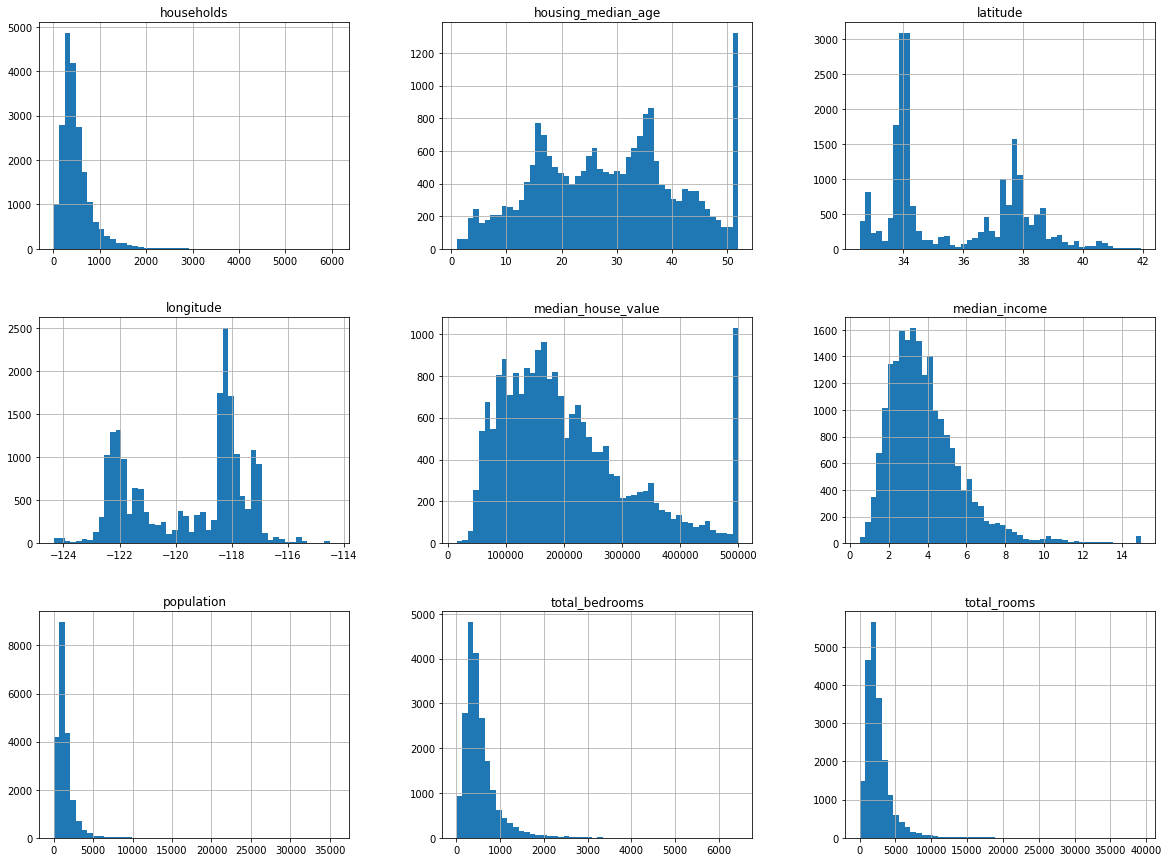

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [7]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)


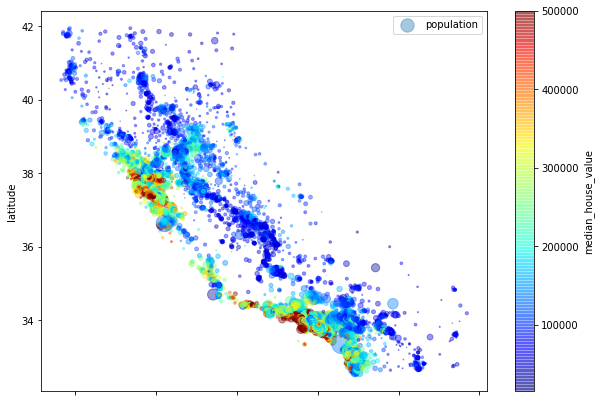

In [10]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [11]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

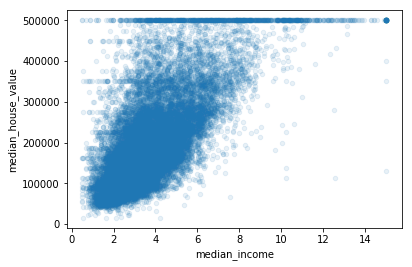

In [12]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [13]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=21)
print(len(train), len(test))


16512 4128


In [15]:
X_train = train.drop('median_house_value', axis=1)
y_train = train['median_house_value'].copy()
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000
mean,-119.567533,35.625190,28.642987,2634.507146,538.463986,1425.778585,500.156674,3.860417,5.418042,0.213370,3.103949
std,2.000296,2.127338,12.537105,2168.182120,417.394434,1106.975375,378.902749,1.896723,2.505767,0.057683,11.602257
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.846154,0.100000,0.750000
25%,-121.790000,33.930000,18.000000,1452.000000,297.000000,792.000000,281.000000,2.557875,4.432844,0.175598,2.427377
50%,-118.490000,34.250000,29.000000,2127.000000,436.000000,1168.000000,410.000000,3.519200,5.218344,0.203604,2.820312
75%,-118.010000,37.710000,37.000000,3153.000000,648.000000,1729.000000,606.000000,4.732575,6.042629,0.240479,3.282433
max,-114.470000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [17]:
option1 = df.dropna(subset=['total_bedrooms'])
option2 = df.drop('total_bedrooms', axis=1)
median_num_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_num_bedrooms, inplace=True)

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_num = df.drop("ocean_proximity", axis=1)
imputer.fit(df_num)
print(imputer.statistics_)
print(df_num.median().values)

[-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]
[-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]


In [19]:
X = imputer.transform(df_num)
# X is a raw numpy array, turn it back into a dataframe
X = pd.DataFrame(X, columns=df_num.columns)
X.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.212940,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057700,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175708,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [20]:
df_cat = df[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
# go back to a dataframe from the raw NumPy array outputted 
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=df_cat.columns)
print(df_cat_encoded["ocean_proximity"].value_counts())
print(ordinal_encoder.categories_)

0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
Name: ocean_proximity, dtype: int64
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [22]:
print(df_cat_1hot.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [23]:
from sklearn.compose import ColumnTransformer
df1 = train.drop('median_house_value', axis=1)
num_attrs = list(df1)
num_attrs.remove("ocean_proximity")
cat_attrs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", SimpleImputer(strategy='median'),num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])
X = full_pipeline.fit_transform(df1)
print(X)

[[-117.57   33.88   39.   ...    0.      0.      0.  ]
 [-121.2    39.23    9.   ...    0.      0.      0.  ]
 [-118.37   34.16   40.   ...    0.      0.      0.  ]
 ...
 [-117.88   34.13   33.   ...    0.      0.      0.  ]
 [-118.45   34.04   22.   ...    0.      0.      0.  ]
 [-117.37   33.19   23.   ...    0.      0.      1.  ]]


In [24]:
y = train['median_house_value'].values
print(y)

[110600. 213300. 282300. ... 185500. 283300. 173800.]


In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
print(lin_reg.predict( X[:5]))

[107967.84213992 168205.99303218 261715.63615971 260581.28141843
  87258.66062935]


In [28]:
print(y[:5])

[110600. 213300. 282300. 269900.  97400.]


In [29]:
from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(X)
mse = mean_squared_error(y, preds)
print(np.sqrt(mse))

67398.12450961188
